In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

supermarket=pd.read_csv('C:/Users/Dell/OneDrive/Masaüstü/supermarket_sales - Sheet1.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
supermarket.head(5)

# https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
supermarket.shape

(1000, 17)

In [3]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
supermarket.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [ ]:
#Veri Dönüştürme

In [6]:
supermarket['date_'] = supermarket['Date'] + ' ' + supermarket['Time']

In [7]:
categorical_variables = ['Branch','City','Customer type','Gender','Product line','Payment'] 
for variable in categorical_variables: 
    supermarket[variable] = supermarket[variable].astype('category')

In [8]:
supermarket['date_'] = pd.to_datetime(supermarket['date_'])

In [9]:
supermarket['month_'] = supermarket['date_'].dt.strftime('%B')

In [10]:
supermarket['day_'] = supermarket['date_'].dt.strftime('%A')

In [11]:
supermarket['hour'] = supermarket['date_'].dt.hour

In [12]:
hours = supermarket['date_'].dt.hour
supermarket['day_period'] = ''

supermarket.loc[(hours >= 10) & (hours < 12), 'day_period'] = 'morning'
supermarket.loc[(hours >= 12) & (hours < 13), 'day_period'] = 'midday'
supermarket.loc[(hours >= 13) & (hours < 17), 'day_period'] = 'afternoon'
supermarket.loc[(hours >= 17) & (hours < 21), 'day_period'] = 'evening'


In [13]:
supermarket.columns = supermarket.columns.str.replace(' ', '_') 

In [14]:
supermarket.columns = [col.lower() for col in supermarket.columns]

In [15]:
columns_to_drop = ['date','time']
supermarket.drop(columns=columns_to_drop, inplace=True)

In [16]:
supermarket['tax_5%']=supermarket['unit_price']*supermarket['quantity']*0.05

In [17]:
supermarket['total']=(supermarket['unit_price']*supermarket['quantity'])+supermarket['tax_5%']

In [18]:
#Tekrar eden satırları çıkartıp indeksleri sıralayalım.
supermarket.drop_duplicates(inplace=True)
supermarket.reset_index(drop=True, inplace=True)

In [19]:
supermarket.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
date_                      0
month_                     0
day_                       0
hour                       0
day_period                 0
dtype: int64

In [20]:
supermarket.to_csv('supermarket_uploaded.csv', index=False) 

In [21]:
max_lengths = {variable: max(len(str(value)) for value in values) for variable, values in supermarket.items()}

print("Değişkenlerin maksimum karakter uzunlukları:")
for variable, length in max_lengths.items():
    print(f"{variable}: {length}")

Değişkenlerin maksimum karakter uzunlukları:
invoice_id: 11
branch: 1
city: 9
customer_type: 6
gender: 6
product_line: 22
unit_price: 5
quantity: 2
tax_5%: 18
total: 18
payment: 11
cogs: 6
gross_margin_percentage: 11
gross_income: 7
rating: 4
date_: 19
month_: 8
day_: 9
hour: 2
day_period: 9


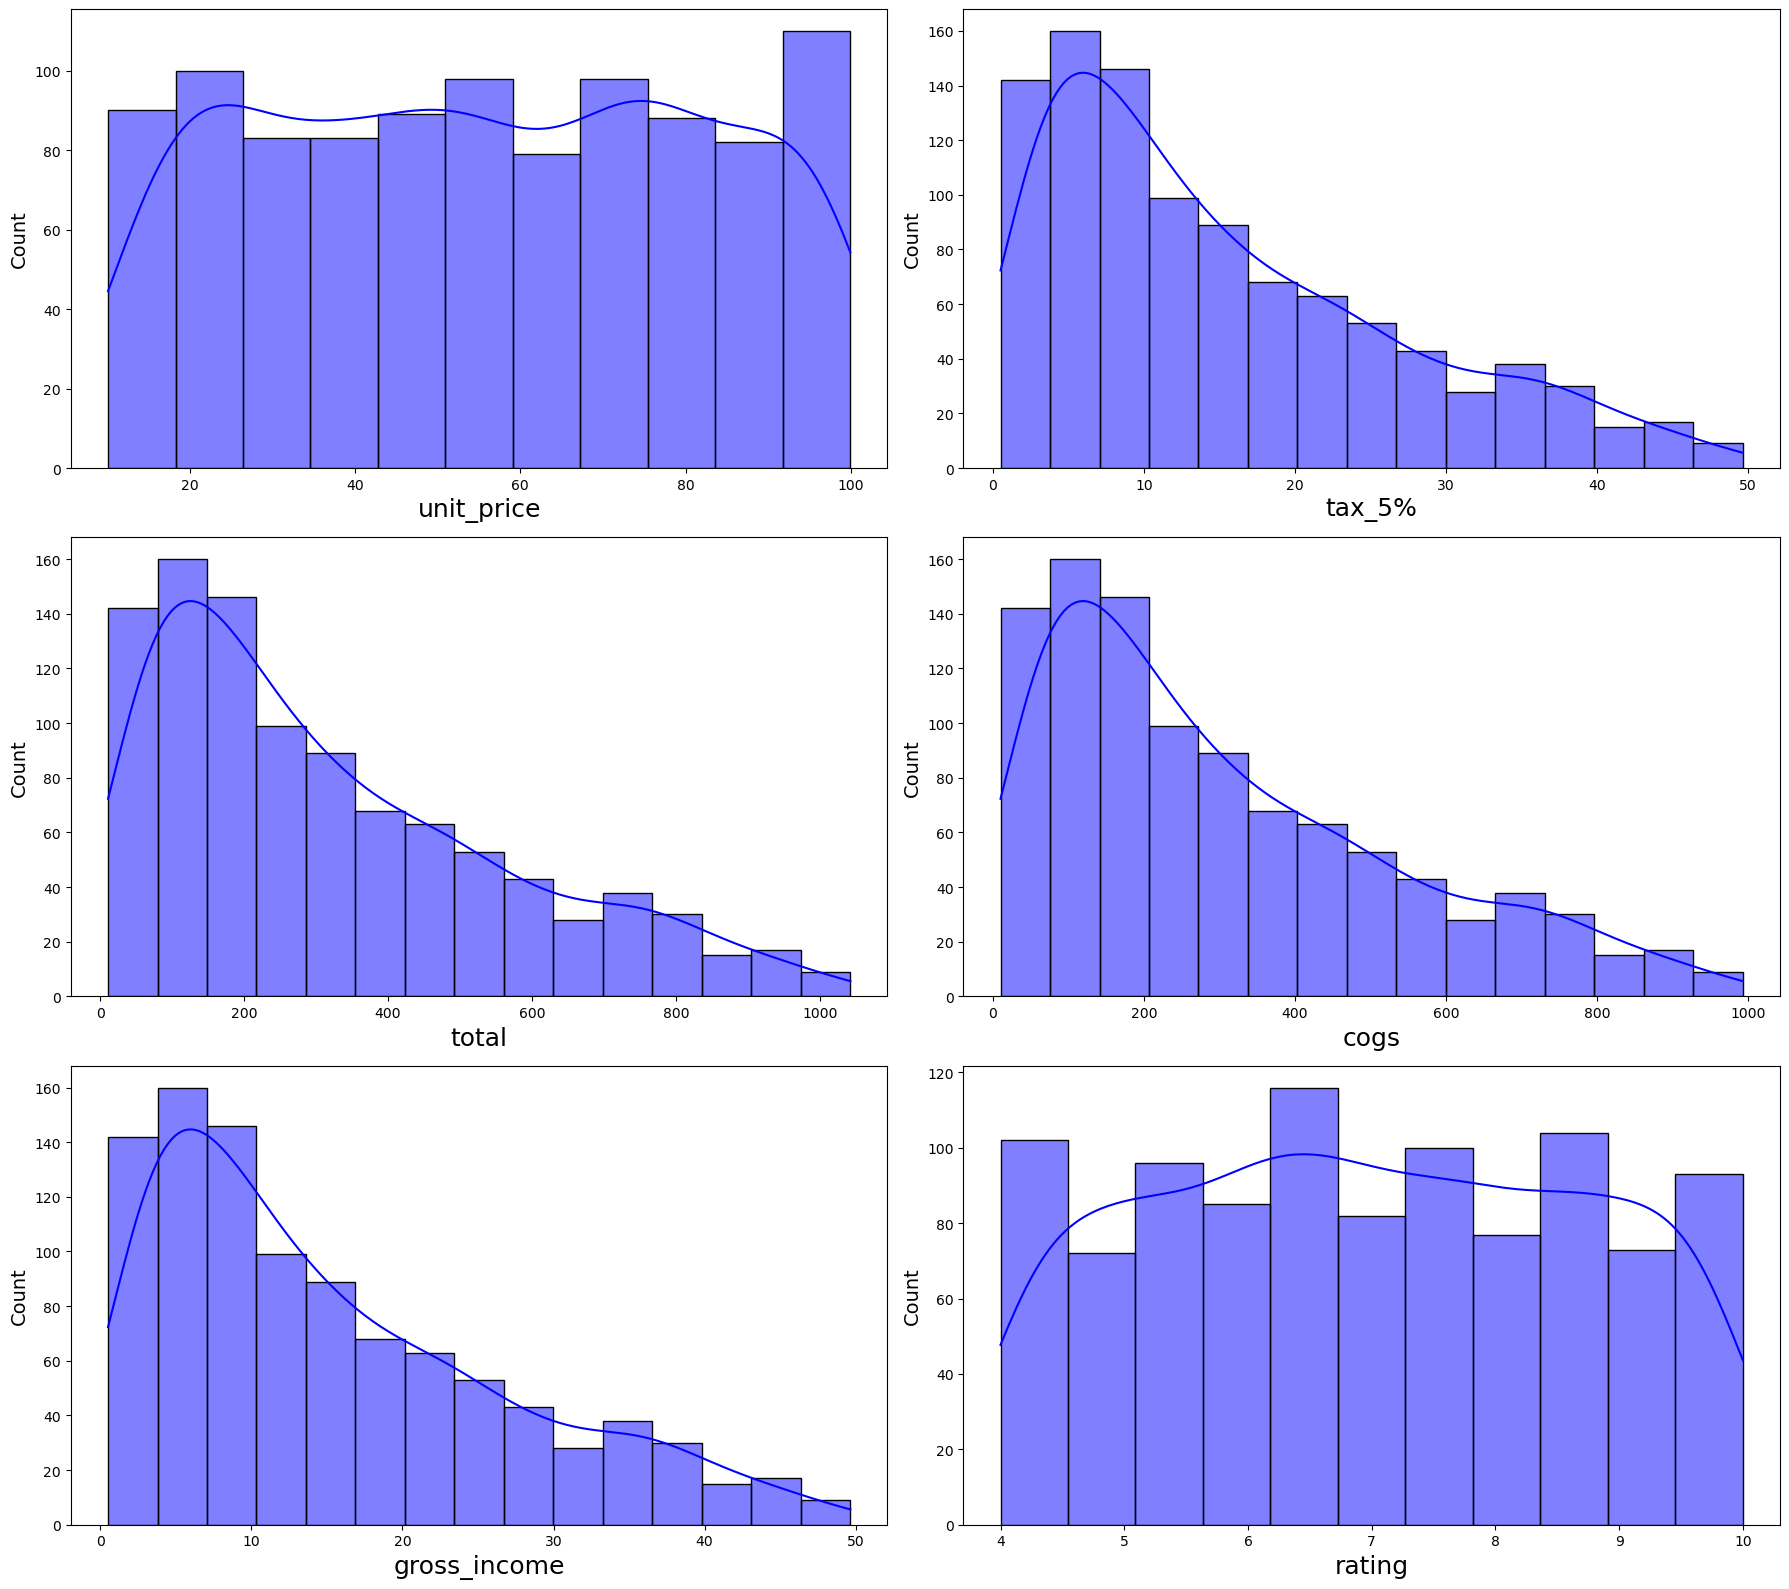

In [22]:
fig, axs = plt.subplots(len(['unit_price','tax_5%','total','cogs',
                             'gross_income','rating']) // 2, 2, figsize=(18, 16))

for i, column in enumerate(['unit_price','tax_5%','total','cogs',
                            'gross_income','rating']):
    row = i // 2
    col = i % 2
    sns.histplot(supermarket[column], kde=True, color='blue', bins='auto', ax=axs[row, col])
    axs[row, col].set_title('')
    axs[row, col].set_xlabel('{}'.format(column), fontsize=18) # X eksenindeki başlık
    axs[row, col].set_ylabel('Count', fontsize=14) # Y eksenindeki başlık

plt.tight_layout()
plt.show()


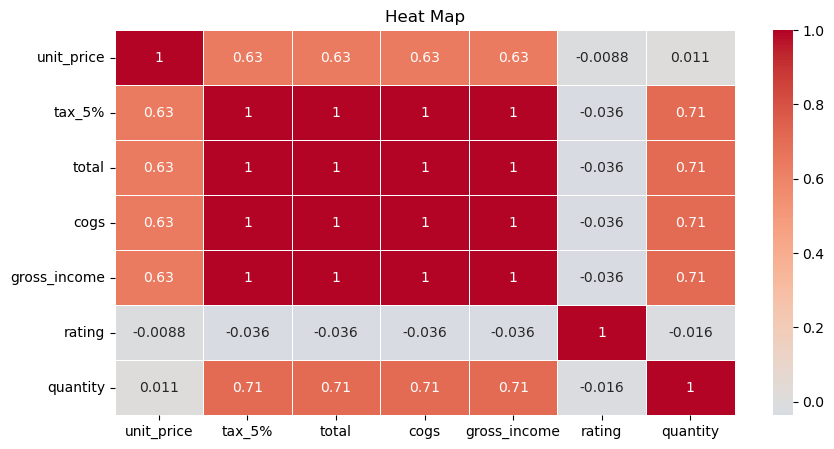

In [23]:
heat_map_data = supermarket[['unit_price','tax_5%','total','cogs',
                             'gross_income','rating','quantity']]
correlation_matrix = heat_map_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heat Map")
plt.show()


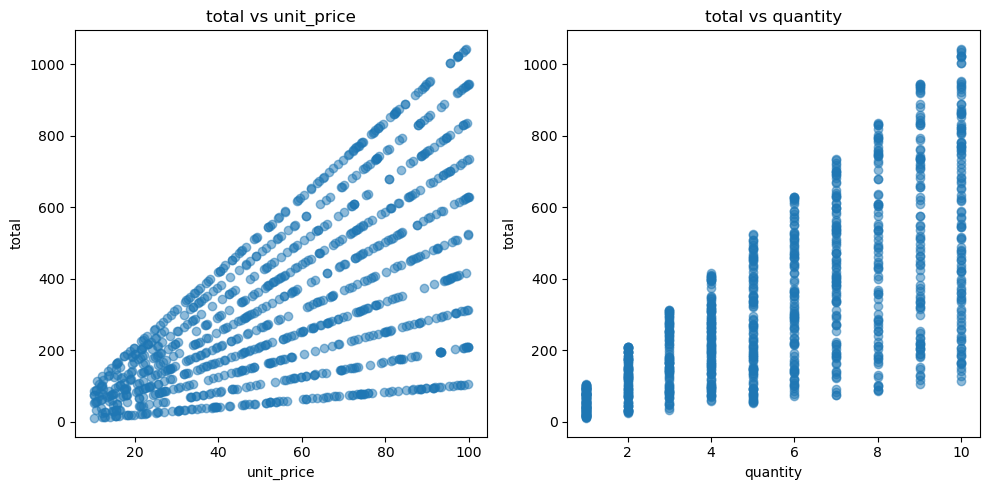

In [24]:
independent_vars = ['unit_price', 'quantity']
dependent_var = 'total'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) # figsize'ı ayarladım
for i, ax in enumerate(axes.flatten()):
    x_var = independent_vars[i]
    ax.scatter(supermarket[x_var], supermarket[dependent_var], alpha=0.5)
    ax.set_title(f'{dependent_var} vs {x_var}')
    ax.set_xlabel(x_var)
    ax.set_ylabel(dependent_var)
plt.tight_layout()
plt.show()


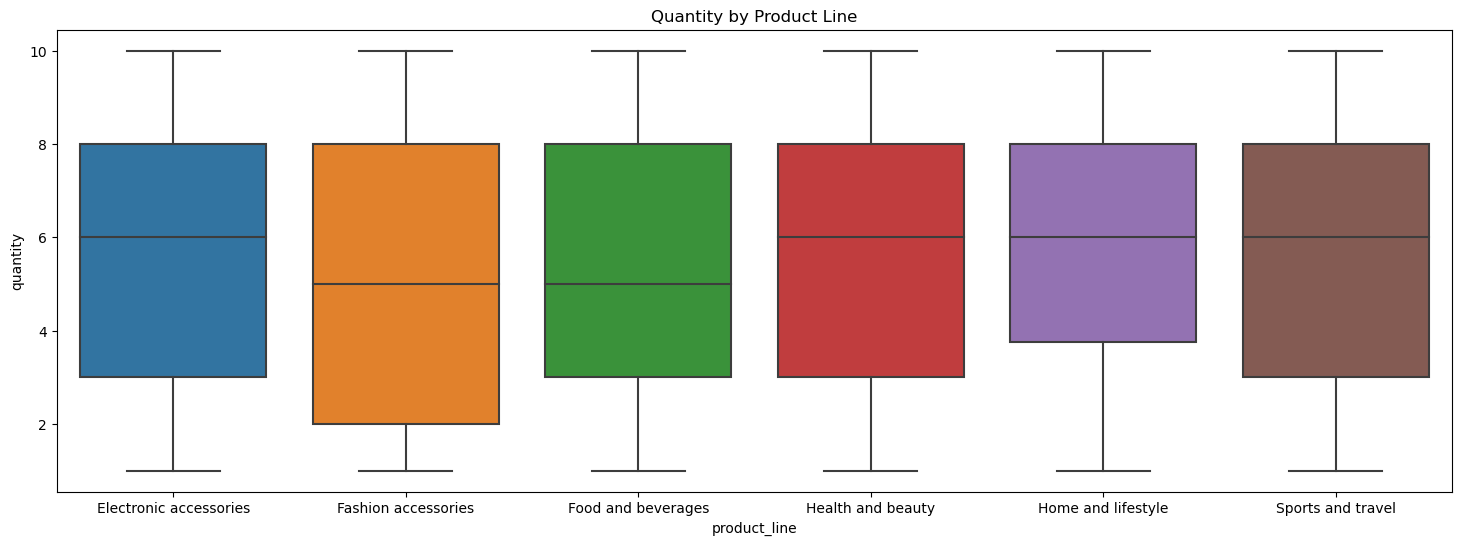

In [25]:
plt.figure(figsize=(18,6))
pl = sorted(supermarket['product_line'].unique())
sns.boxplot(x='product_line', y="quantity", data=supermarket, order=pl)
plt.xticks(rotation=360)
plt.title('Quantity by Product Line')
plt.show()

In [26]:
supermarket.groupby(['product_line', 'gender'])['quantity'].sum().reset_index()


,product_line,gender,quantity
0,Electronic accessories,Female,488
1,Electronic accessories,Male,483
2,Fashion accessories,Female,530
3,Fashion accessories,Male,372
4,Food and beverages,Female,514
5,Food and beverages,Male,438
6,Health and beauty,Female,343
7,Health and beauty,Male,511
8,Home and lifestyle,Female,498
9,Home and lifestyle,Male,413


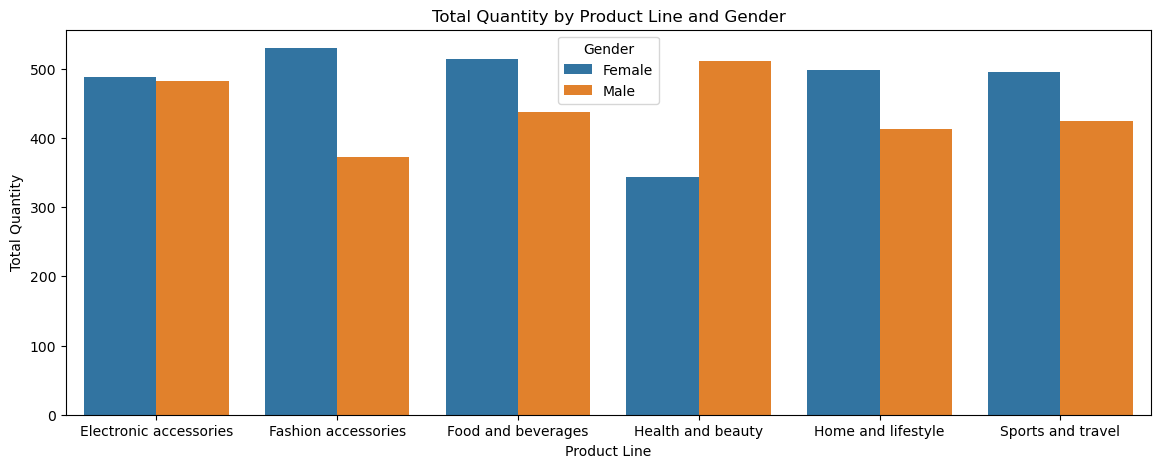

In [27]:
grouped_data = supermarket.groupby(['product_line', 'gender'])['quantity'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.barplot(data=grouped_data, x='product_line', y='quantity', hue='gender')
plt.title('Total Quantity by Product Line and Gender')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity')
plt.legend(title='Gender')
plt.xticks(rotation=0)

plt.show()

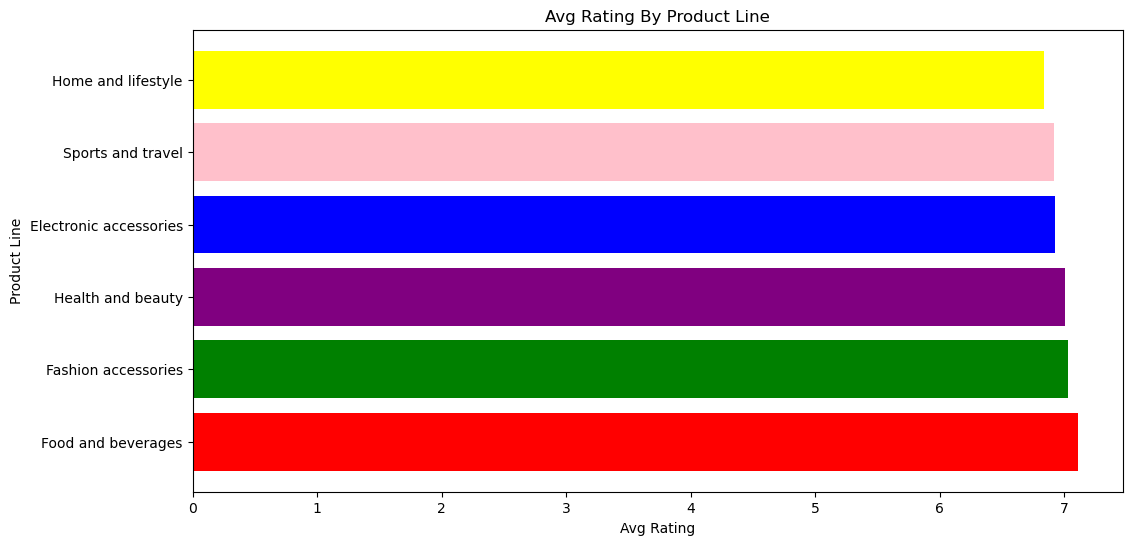

In [28]:
grouped_df = supermarket.groupby('product_line')['rating'].mean()
grouped_df = grouped_df.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(grouped_df.index, grouped_df.values, color=['red','green','purple','blue','pink','yellow'])
plt.xlabel('Avg Rating')
plt.ylabel('Product Line')
plt.title('Avg Rating By Product Line')
plt.show()


In [29]:
min_rating = min(supermarket['rating'])
max_rating=max(supermarket['rating'])

print("Min {}".format(min_rating))
print("Max {}".format(max_rating))

Min 4.0
Max 10.0


In [30]:
supermarket[supermarket['rating']==6.1].head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,cogs,gross_margin_percentage,gross_income,rating,date_,month_,day_,hour,day_period
53,778-71-5554,C,Naypyitaw,Member,Male,Fashion accessories,15.43,1,0.7715,16.2015,Credit card,15.43,4.761905,0.7715,6.1,2019-01-25 15:46:00,January,Friday,15,afternoon
89,318-68-5053,B,Mandalay,Normal,Female,Health and beauty,76.99,6,23.0970,485.0370,Cash,461.94,4.761905,23.0970,6.1,2019-02-27 17:55:00,February,Wednesday,17,evening
156,279-74-2924,B,Mandalay,Member,Male,Electronic accessories,72.17,1,3.6085,75.7785,Cash,72.17,4.761905,3.6085,6.1,2019-01-04 19:40:00,January,Friday,19,evening
197,856-22-8149,A,Yangon,Normal,Female,Home and lifestyle,25.29,1,1.2645,26.5545,Ewallet,25.29,4.761905,1.2645,6.1,2019-03-23 10:13:00,March,Saturday,10,morning
220,239-36-3640,B,Mandalay,Normal,Male,Electronic accessories,45.35,6,13.6050,285.7050,Ewallet,272.10,4.761905,13.6050,6.1,2019-01-31 13:44:00,January,Thursday,13,afternoon


In [31]:
supermarket['rating_interval'] = '-'  # Varsayılan değer olarak '-' belirleyelim

# Rating aralıklarını kontrol edelim ve rating_interval sütununu güncelleyelim
supermarket.loc[(supermarket['rating'] >= 4) & (supermarket['rating'] <= 6), 'rating_interval'] = '4-6'
supermarket.loc[(supermarket['rating'] >= 6.1) & (supermarket['rating'] <= 8), 'rating_interval'] = '6.1-8'
supermarket.loc[(supermarket['rating'] >= 8.1) & (supermarket['rating'] <= 10), 'rating_interval'] = '8.1-10'


In [32]:
supermarket.groupby(['branch', 'rating_interval']).size().reset_index(name='count') 

,branch,rating_interval,count
0,A,4-6,114
1,A,6.1-8,120
2,A,8.1-10,106
3,B,4-6,120
4,B,6.1-8,123
5,B,8.1-10,89
6,C,4-6,107
7,C,6.1-8,108
8,C,8.1-10,113


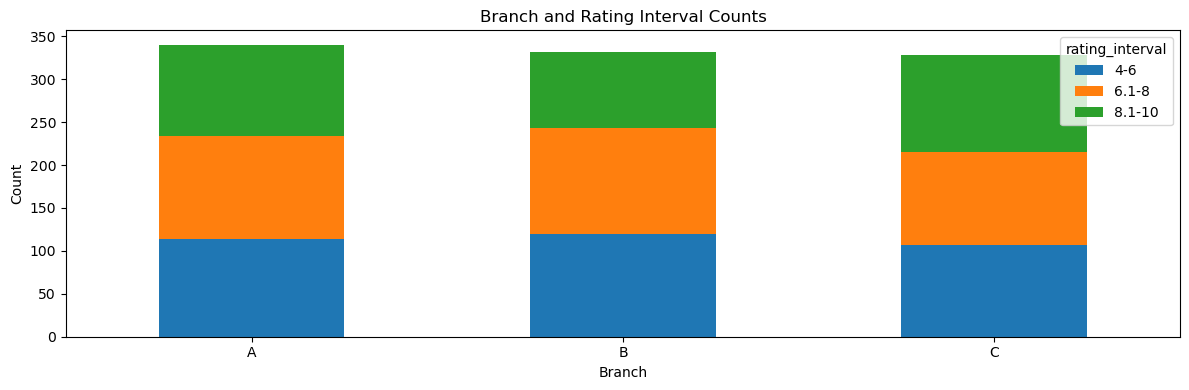

In [33]:
pivot_data = supermarket.groupby(['branch', 'rating_interval']).size().reset_index(name='count').pivot(index='branch', columns='rating_interval', values='count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Branch and Rating Interval Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


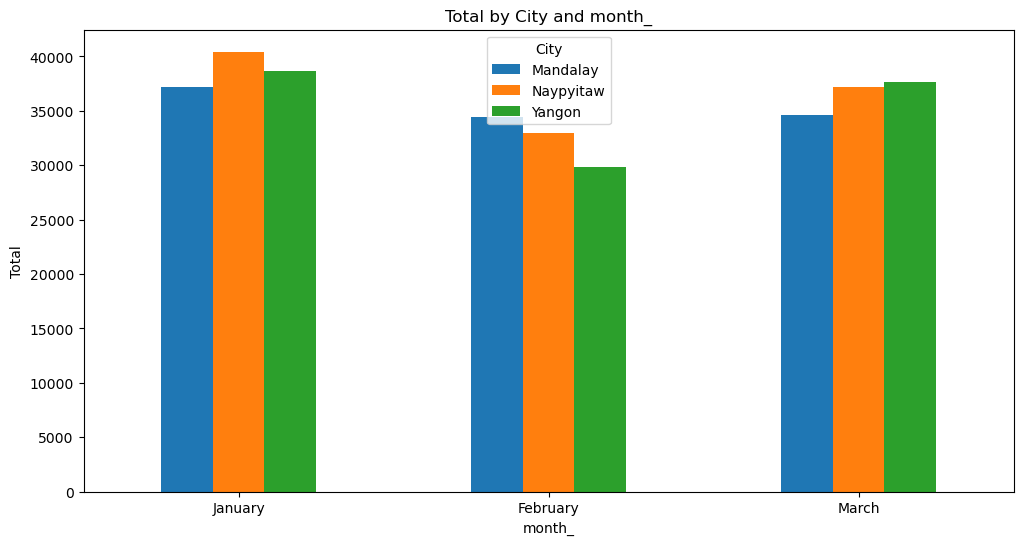

In [34]:
months_ordered = ['January', 'February', 'March']
grouped = supermarket.groupby(['city', 'month_']).sum().reset_index()

grouped['month_'] = pd.Categorical(grouped['month_'], categories=months_ordered, ordered=True)
grouped = grouped.sort_values('month_')

fig, ax = plt.subplots(figsize=(12, 6))
grouped.pivot(index='month_', columns='city', values='total').plot(kind='bar', ax=ax)
plt.xlabel('month_')
plt.ylabel('Total')
plt.title('Total by City and month_')
plt.xticks(rotation=0)
plt.legend(title='City')
plt.show()


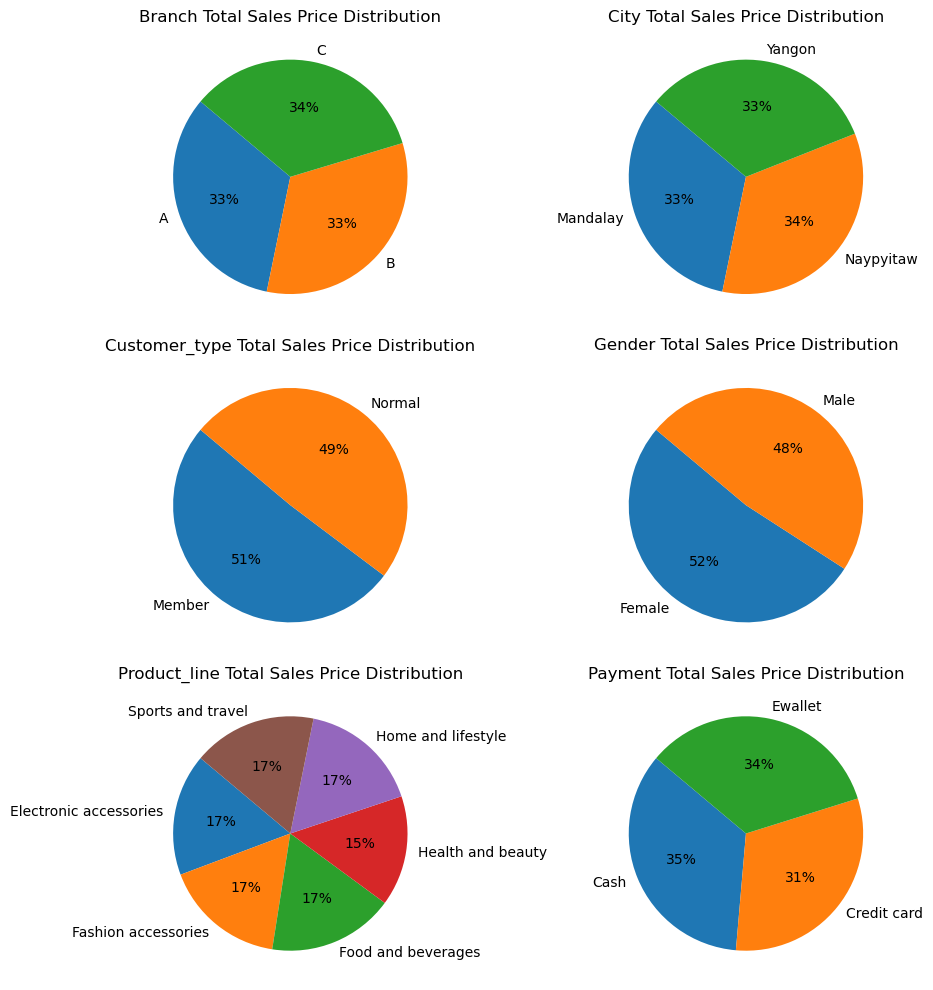

In [35]:
variables=['branch','city','customer_type','gender','product_line','payment']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for idx, var in enumerate(variables):
    # Gruplama ve toplam satışları hesaplama
    grouped_data = supermarket.groupby(var)['total'].sum()
    
    ax = axes[idx//2, idx%2]
    ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.0f%%', startangle=140)
    ax.set_title(f'{var.capitalize()} Total Sales Price Distribution')

plt.tight_layout()
plt.show()


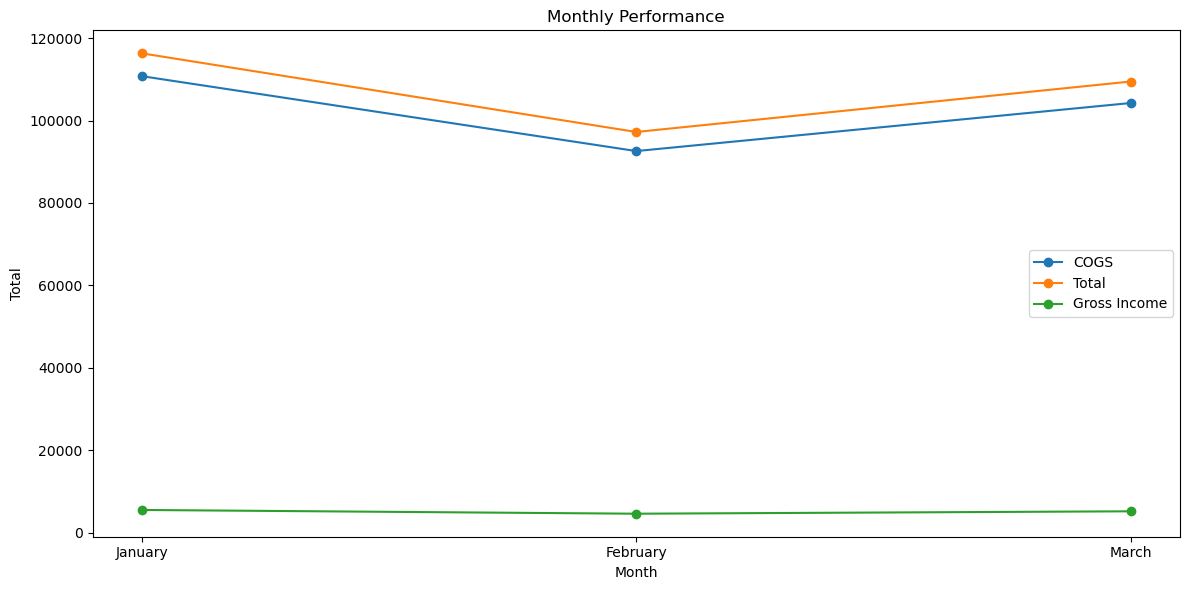

In [36]:
months_order = ['January', 'February', 'March']
supermarket['month_'] = pd.Categorical(supermarket['month_'], categories=months_order, ordered=True)

# Ay isimlerine göre gruplayıp toplamı alalım
monthly_data = supermarket.groupby('month_').sum()

# Grafik oluşturalım
plt.figure(figsize=(12, 6))

plt.plot(monthly_data.index, monthly_data['cogs'],marker='o', label='COGS')
plt.plot(monthly_data.index, monthly_data['total'],marker='o', label='Total')
plt.plot(monthly_data.index, monthly_data['gross_income'],marker='o', label='Gross Income')

plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Monthly Performance')

plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
supermarket.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,cogs,gross_margin_percentage,gross_income,rating,date_,month_,day_,hour,day_period,rating_interval
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,January,Saturday,13,afternoon,8.1-10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,March,Friday,10,morning,8.1-10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,March,Sunday,13,afternoon,6.1-8
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,January,Sunday,20,evening,8.1-10
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,February,Friday,10,morning,4-6


In [38]:
monthly_data

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating,hour
month_,,,,,,,,,
January,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2,5215
February,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6,4468
March,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9,5227


In [39]:
supermarket.sort_values(by='date_')['date_'] #marketin açılış ve kapanış saati hk. bilgi verilmemiş.
#biz saat 10.00'da açılıp 21.00'da kapandığını varsayalım.

17    2019-01-01 10:39:00
970   2019-01-01 11:36:00
839   2019-01-01 11:40:00
523   2019-01-01 11:43:00
567   2019-01-01 13:55:00
              ...        
671   2019-03-30 16:34:00
474   2019-03-30 17:04:00
473   2019-03-30 17:58:00
643   2019-03-30 19:26:00
963   2019-03-30 20:37:00
Name: date_, Length: 1000, dtype: datetime64[ns]

In [40]:
invoice_counts = supermarket.groupby('day_period')['invoice_id'].count()

print(invoice_counts)

day_period
afternoon    365
evening      355
midday        89
morning      191
Name: invoice_id, dtype: int64


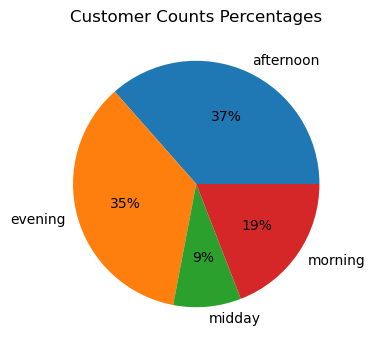

In [41]:
invoice_counts = supermarket.groupby('day_period')['invoice_id'].count()

plt.figure(figsize=(4, 4))
plt.pie(invoice_counts, labels=invoice_counts.index, autopct='%1.0f%%')
plt.title('Customer Counts Percentages')
plt.show()

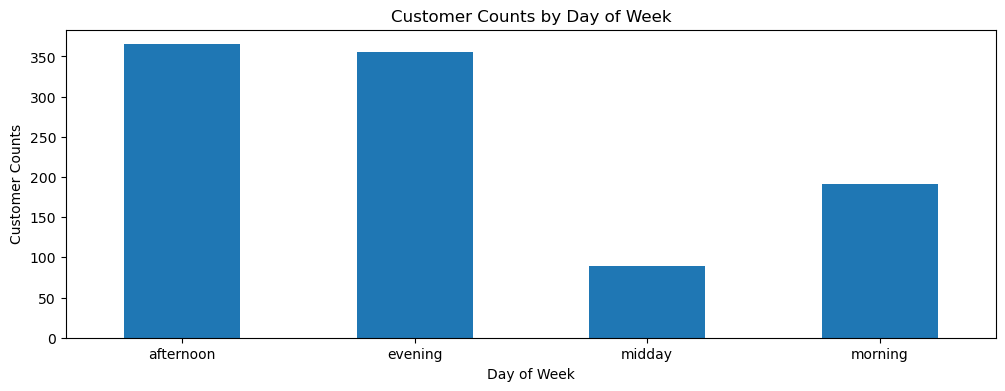

In [43]:
supermarket['day_']=pd.Categorical(supermarket['day_'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

customer_counts = supermarket.groupby('day_')['date_'].count()

plt.figure(figsize=(12, 4))
invoice_counts.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Customer Counts')
plt.title('Customer Counts by Day of Week')
plt.xticks(rotation=0)
plt.show()